Name: Arijit Roy Chowdhury
    
Email: rc.arijit@gmail.com
    
Role: Data Scientist

# Outlier-Treatment

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Outliers, being the most extreme observations, may include the sample maximum or sample minimum, or both, depending on whether they are extremely high or low. However, the sample maximum and minimum are not always outliers because they may not be unusually far from other observations.

Outliers are not always undesirable, for example in case of Anomaly Detection Problems like Financial Frauds, Disease Detection, Fault Test Analysis etc., outliers play an important role as the key intention of such analysis is to detect outliers and hence in such scenarios, we must not manipulate them.

However in scenarios like Product Cost, Weather Predictions, Quality Predictions etc., Outliers may potentially impact the results of the analysis and must be treated accordingly.

The two common approaches to exclude outliers are truncation (or trimming) and Winsorising. Trimming discards the outliers whereas Winsorising replaces the outliers with the nearest "non-suspect" data like Mean / Median / etc..

Let's try to understand both the methods of Outlier Treatments, ie. Truncation and Winsorising

# Import Libraries

In [1]:
import time
import random
import pandas as pd
import pandas_profiling as pp
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 200) 

C:\Python\Python39\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
# Read the CSV File using Pandas and store it as a dataframe 'df':

df = pd.read_csv('Dataset/QualityPrediction.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
# Check for Missing Data

total = df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

# Insight: There is no missing data in any of the columns

Total  Percent
fixed acidity             0      0.0
volatile acidity          0      0.0
citric acid               0      0.0
residual sugar            0      0.0
chlorides                 0      0.0
free sulfur dioxide       0      0.0
total sulfur dioxide      0      0.0
density                   0      0.0
pH                        0      0.0
sulphates                 0      0.0
alcohol                   0      0.0
quality                   0      0.0

# Identify Columns with Outliers

There are several ways to identify Outliers:

   1) Significant difference between Mean and Median of a particular column
   
   2) Z-Score >= 3 for individual values in each column
   
   3) All values above (say) 90th percentile and all values below (say) 10th percentile values of each column
   
   4) Box Plot for each column

In [4]:
# Create copies of the original DataFrame to keep the original DataFrame intact:
df1 = df.copy(deep = True)
df2 = df.copy(deep = True)
df3 = df.copy(deep = True)

# Outlier Check: Boxplots and Pairplots

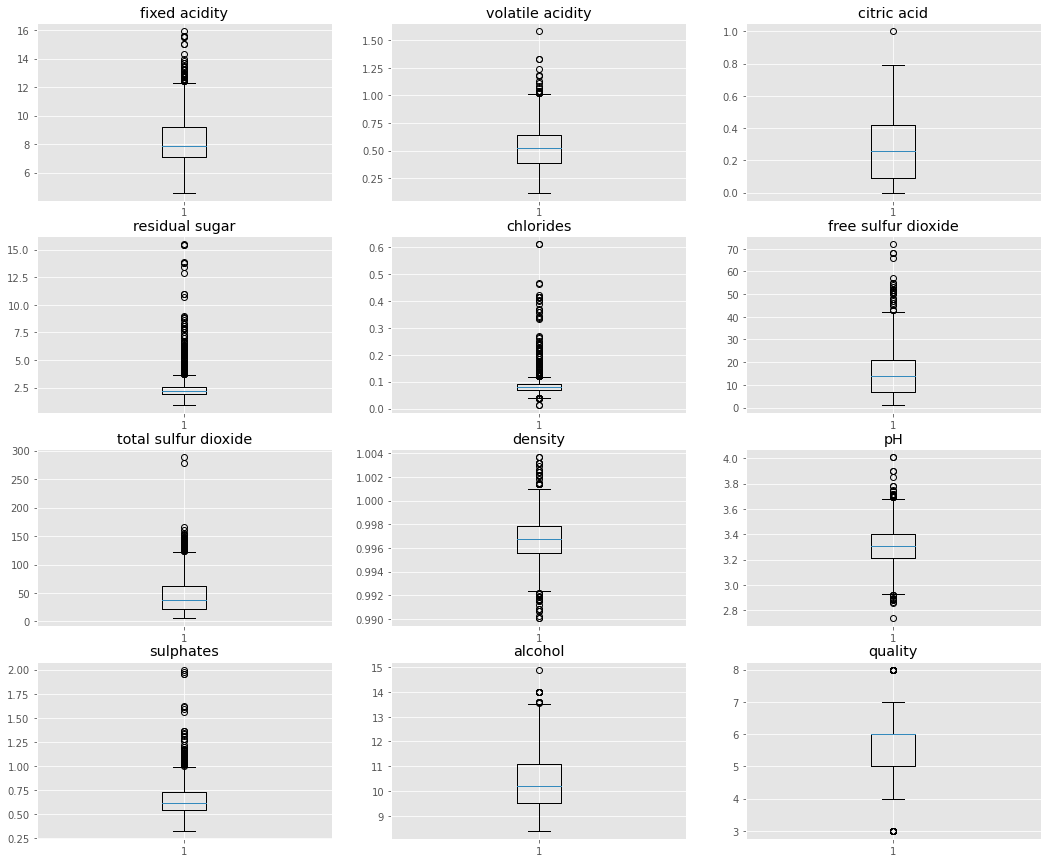

In [5]:
try:
    cols1 = list(df1.columns)
    fig, ax = plt.subplots(4, 3, figsize=(18, 15))
    c = 0
    for i in range(4):
        for j in range(3):
            ax[i, j].boxplot(df1[[cols1[c]]])
            ax[i, j].set_title(cols1[c])
            c=c+1
    plt.show()    
except:
    pass

# Insights on Outliers: Box Plots shows that most of the variables have outliers. Hence Outlier Treatment is necessary

The circles above and below Q1 and Q5 of the Box Plots are the Outliers.

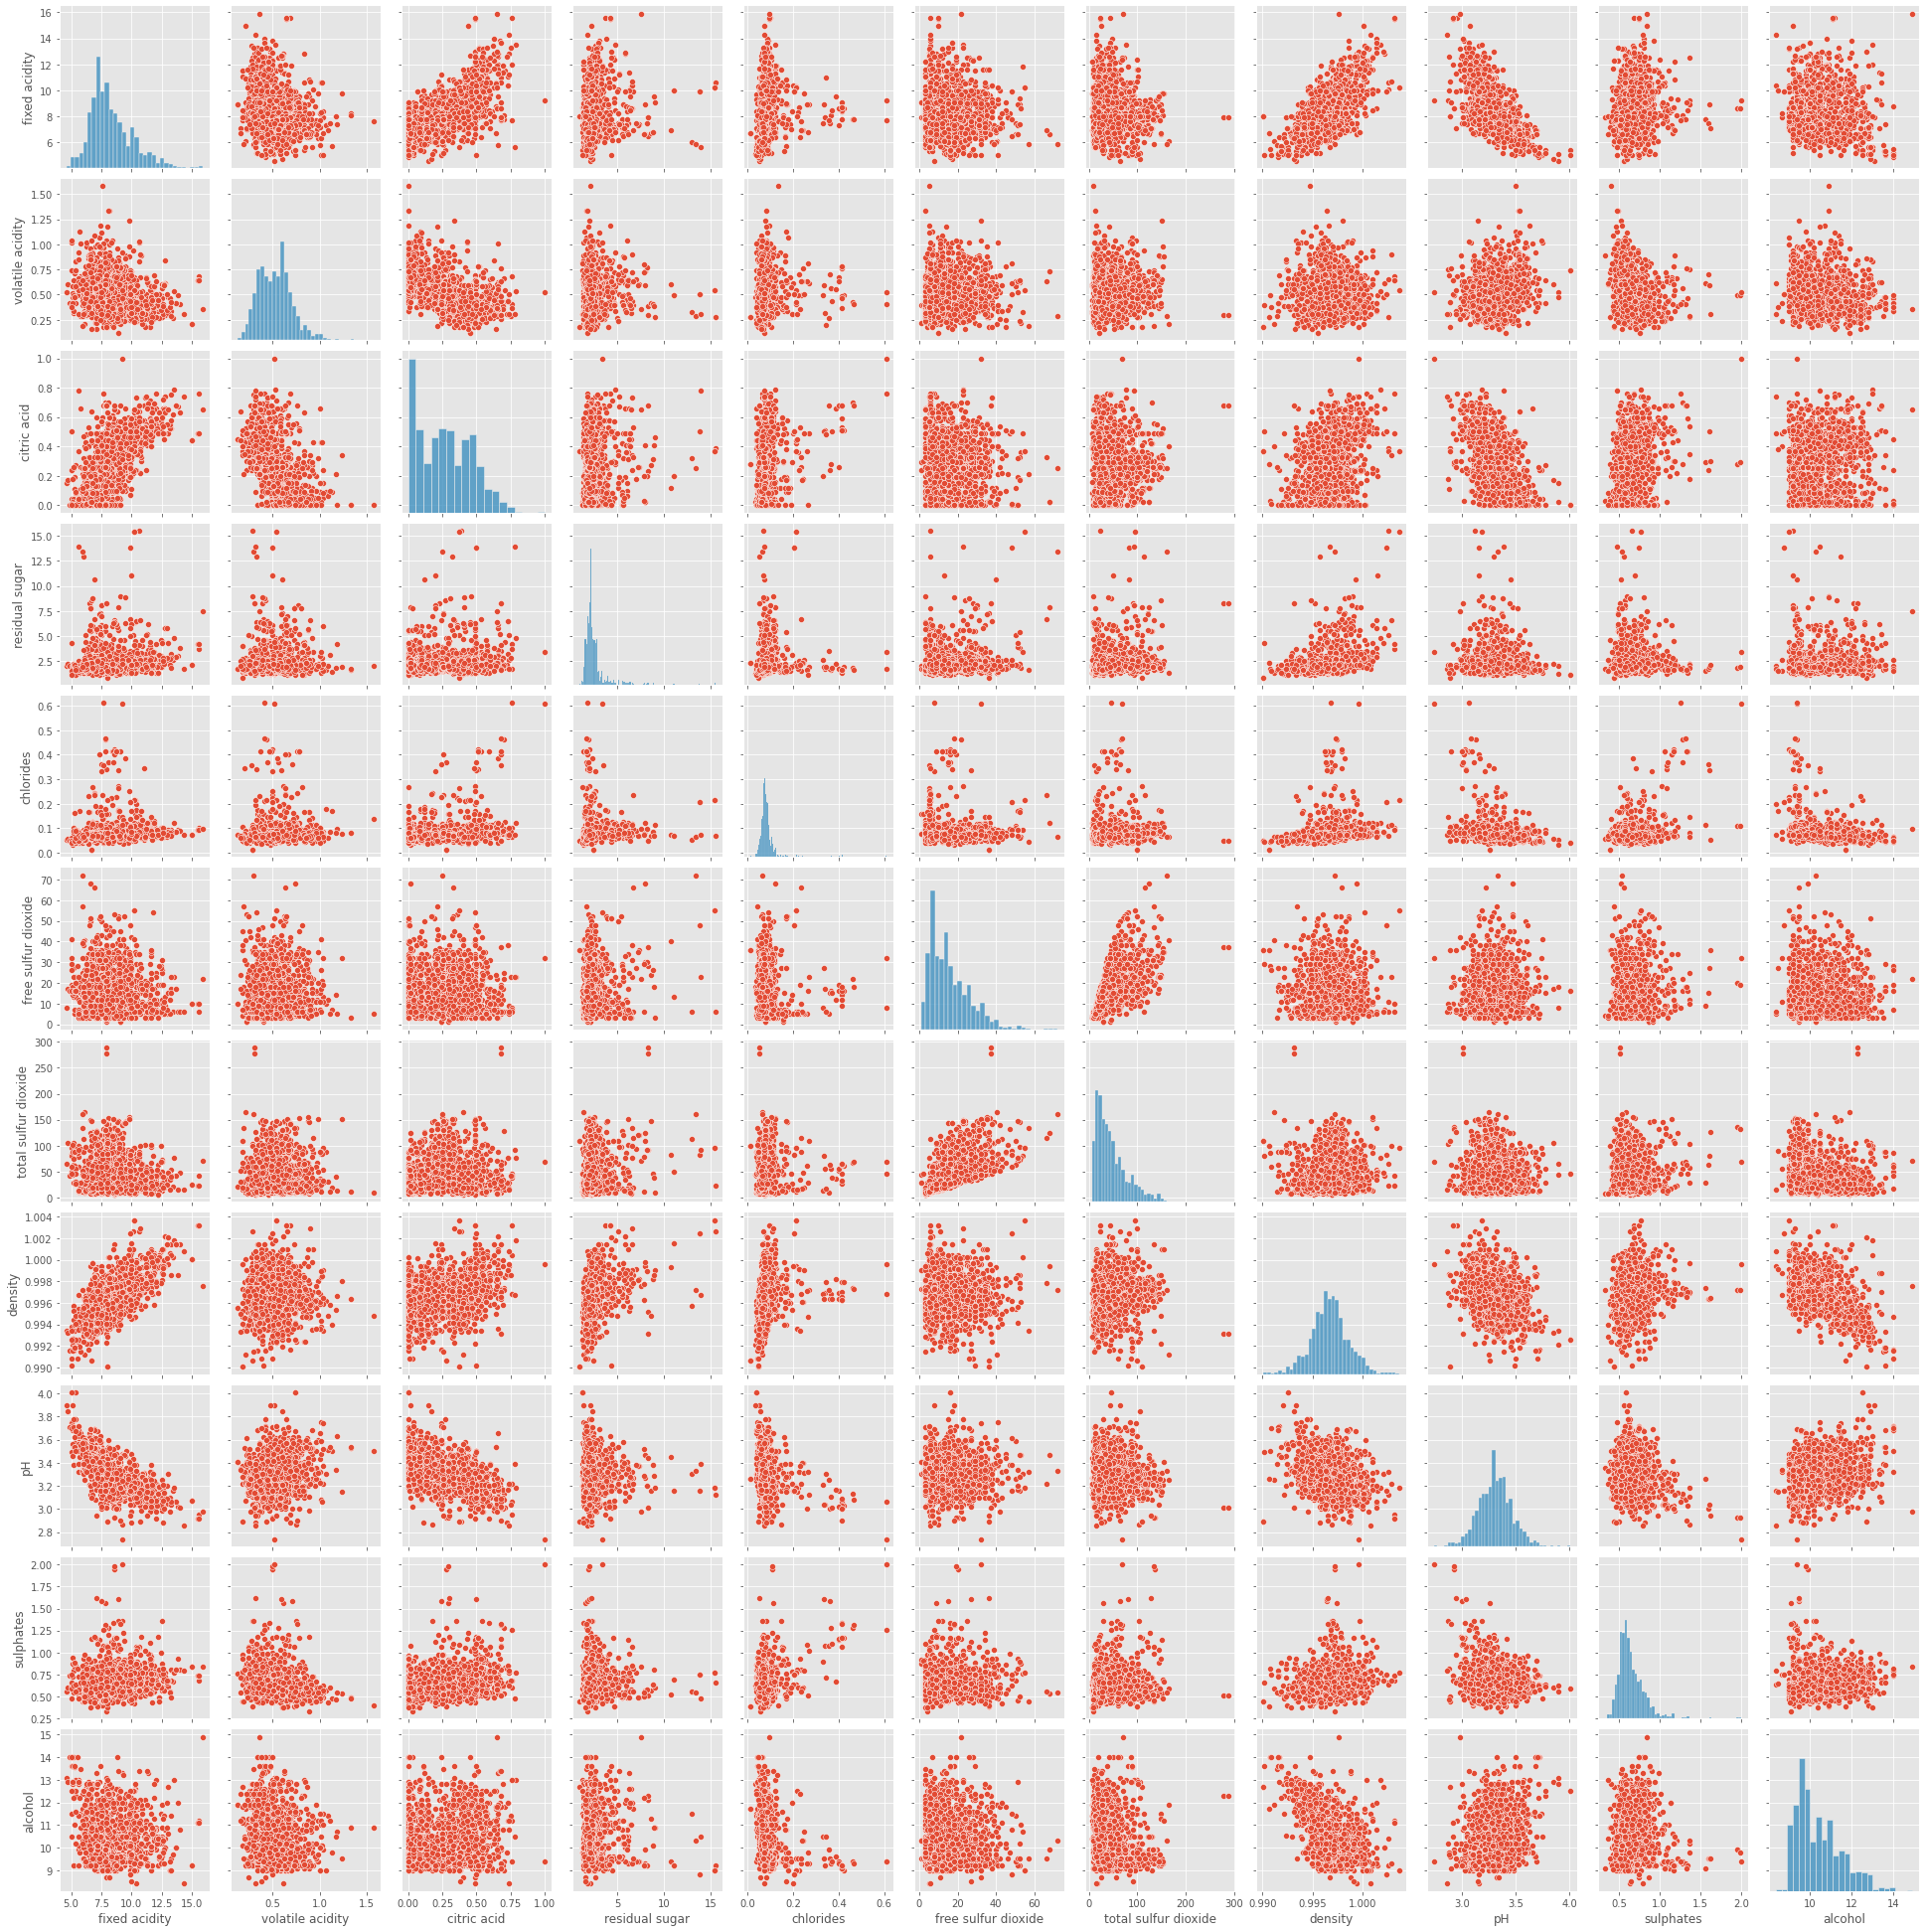

In [6]:
# The same is observed from the scatter plots as well:
sns.pairplot(df1.drop(['quality'], axis=1))

The isolated points away from the remaining points are the outliers

# Outlier Treatment

The two common approaches to exclude outliers are truncation (or trimming) and Winsorising. Trimming discards the outliers whereas Winsorising replaces the outliers with the nearest "non-suspect" data like Mean / Median / etc..

Let's try to understand both the methods of Outlier Treatments, ie. Truncation and Winsorising

# Truncation

The objective is to remove the entire row where at least 1 of the values is an outlier

In [7]:
# Method 1: Remove all rows with at least 1 value above 90th Percentile or below 10th Percentile value of the respective column

for col in df1.columns:
    q1 = df1[col].quantile(0.1)
    q2 = df1[col].quantile(0.9)

    df1 = df1[df1[col].between(q1, q2)]  

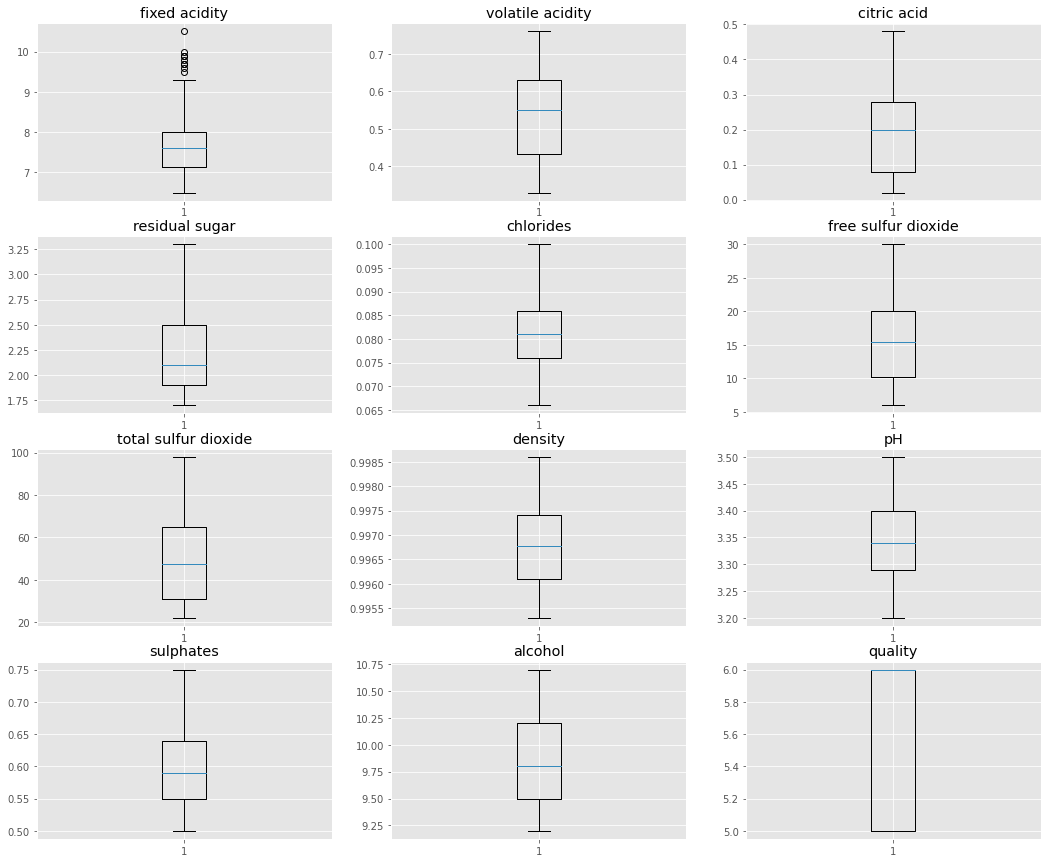

In [8]:
# Plot box plots again to verify the application of Outlier Treatment by Method 1

try:
    cols1 = list(df1.columns)
    fig, ax = plt.subplots(4, 3, figsize=(18, 15))
    c = 0
    for i in range(4):
        for j in range(3):
            ax[i, j].boxplot(df1[[cols1[c]]])
            ax[i, j].set_title(cols1[c])
            c=c+1
    plt.show()    
except:
    pass

# Insights: Most of the outliers are removed as evident from the Box Plots

In [9]:
# Method 2: Keep only those rows where the Z Score of all columns is < 3. 
# Basically drop all rows where Z Score value of at least 1 column >= 3

from scipy import stats
df2 = df2[(np.abs(stats.zscore(df2)) <= 3).all(axis=1)]

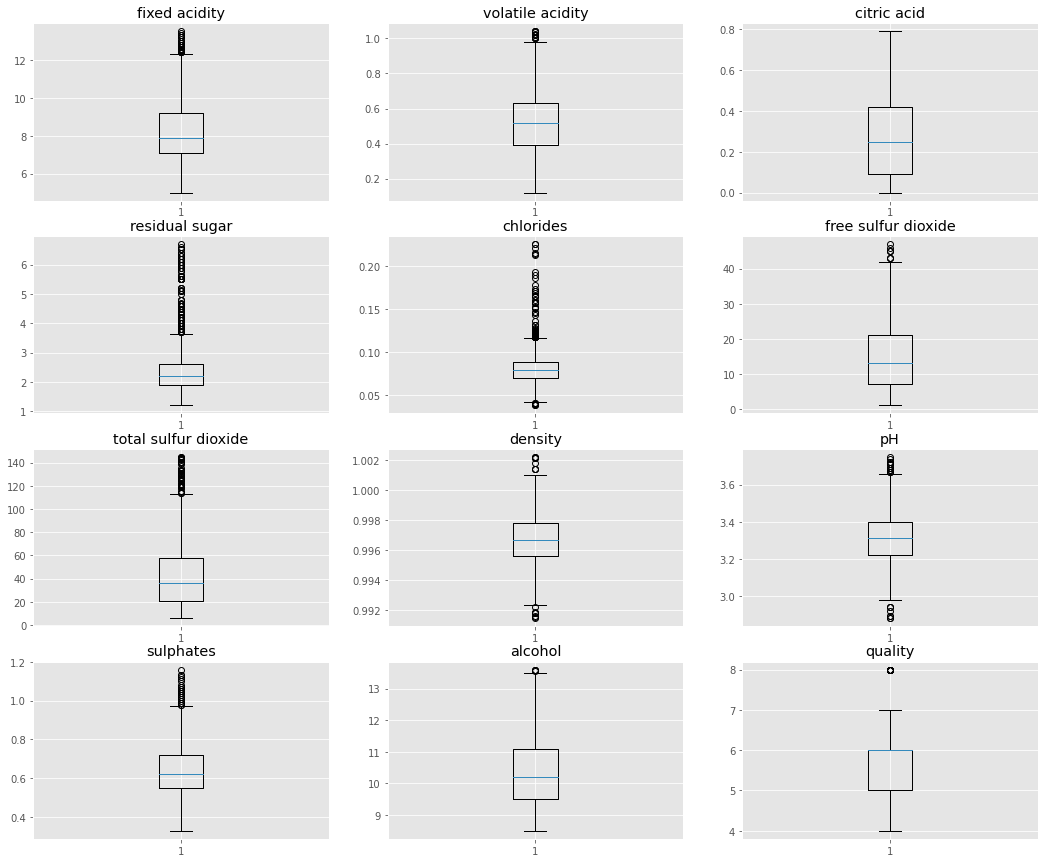

In [10]:
# Plot box plots again to verify the application of Outlier Treatment by Method 2

try:
    cols1 = list(df2.columns)
    fig, ax = plt.subplots(4, 3, figsize=(18, 15))
    c = 0
    for i in range(4):
        for j in range(3):
            ax[i, j].boxplot(df2[[cols1[c]]])
            ax[i, j].set_title(cols1[c])
            c=c+1
    plt.show()    
except:
    pass

# Insights: Some of the outliers are removed but some still remain as evident from the Box Plots

# Winsorising

In [11]:
# Method 1: 
# Replace all values below 10th Percentile with 10th percentile value
# Replace all values above 90th Percentile with 90th percentile value

for col in df3.columns:
    df3[col].loc[df3[col] < df3[col].quantile(0.10)] = df3[col].quantile(0.10)
    df3[col].loc[df3[col] > df3[col].quantile(0.90)] = df3[col].quantile(0.90)

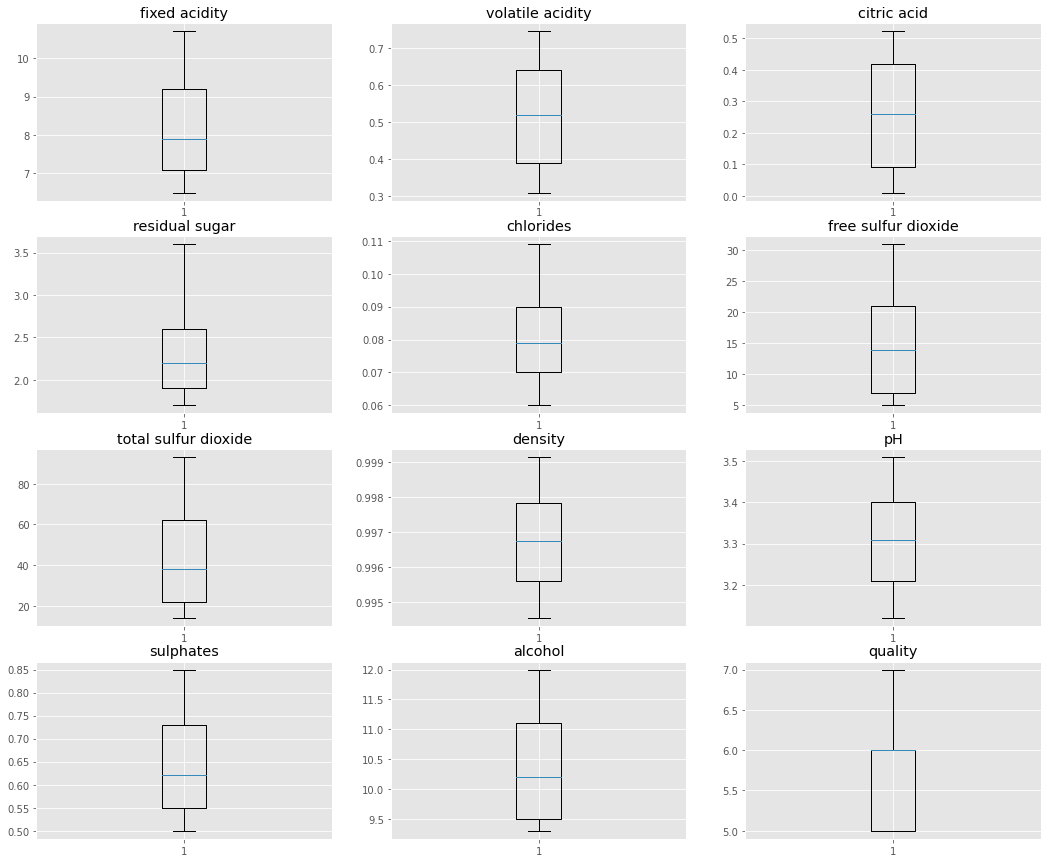

In [12]:
# Plot box plots again to verify the application of Outlier Treatment by Method 1

try:
    cols1 = list(df3.columns)
    fig, ax = plt.subplots(4, 3, figsize=(18, 15))
    c = 0
    for i in range(4):
        for j in range(3):
            ax[i, j].boxplot(df3[[cols1[c]]])
            ax[i, j].set_title(cols1[c])
            c=c+1
    plt.show()    
except:
    pass

# Insights: All outliers are removed 

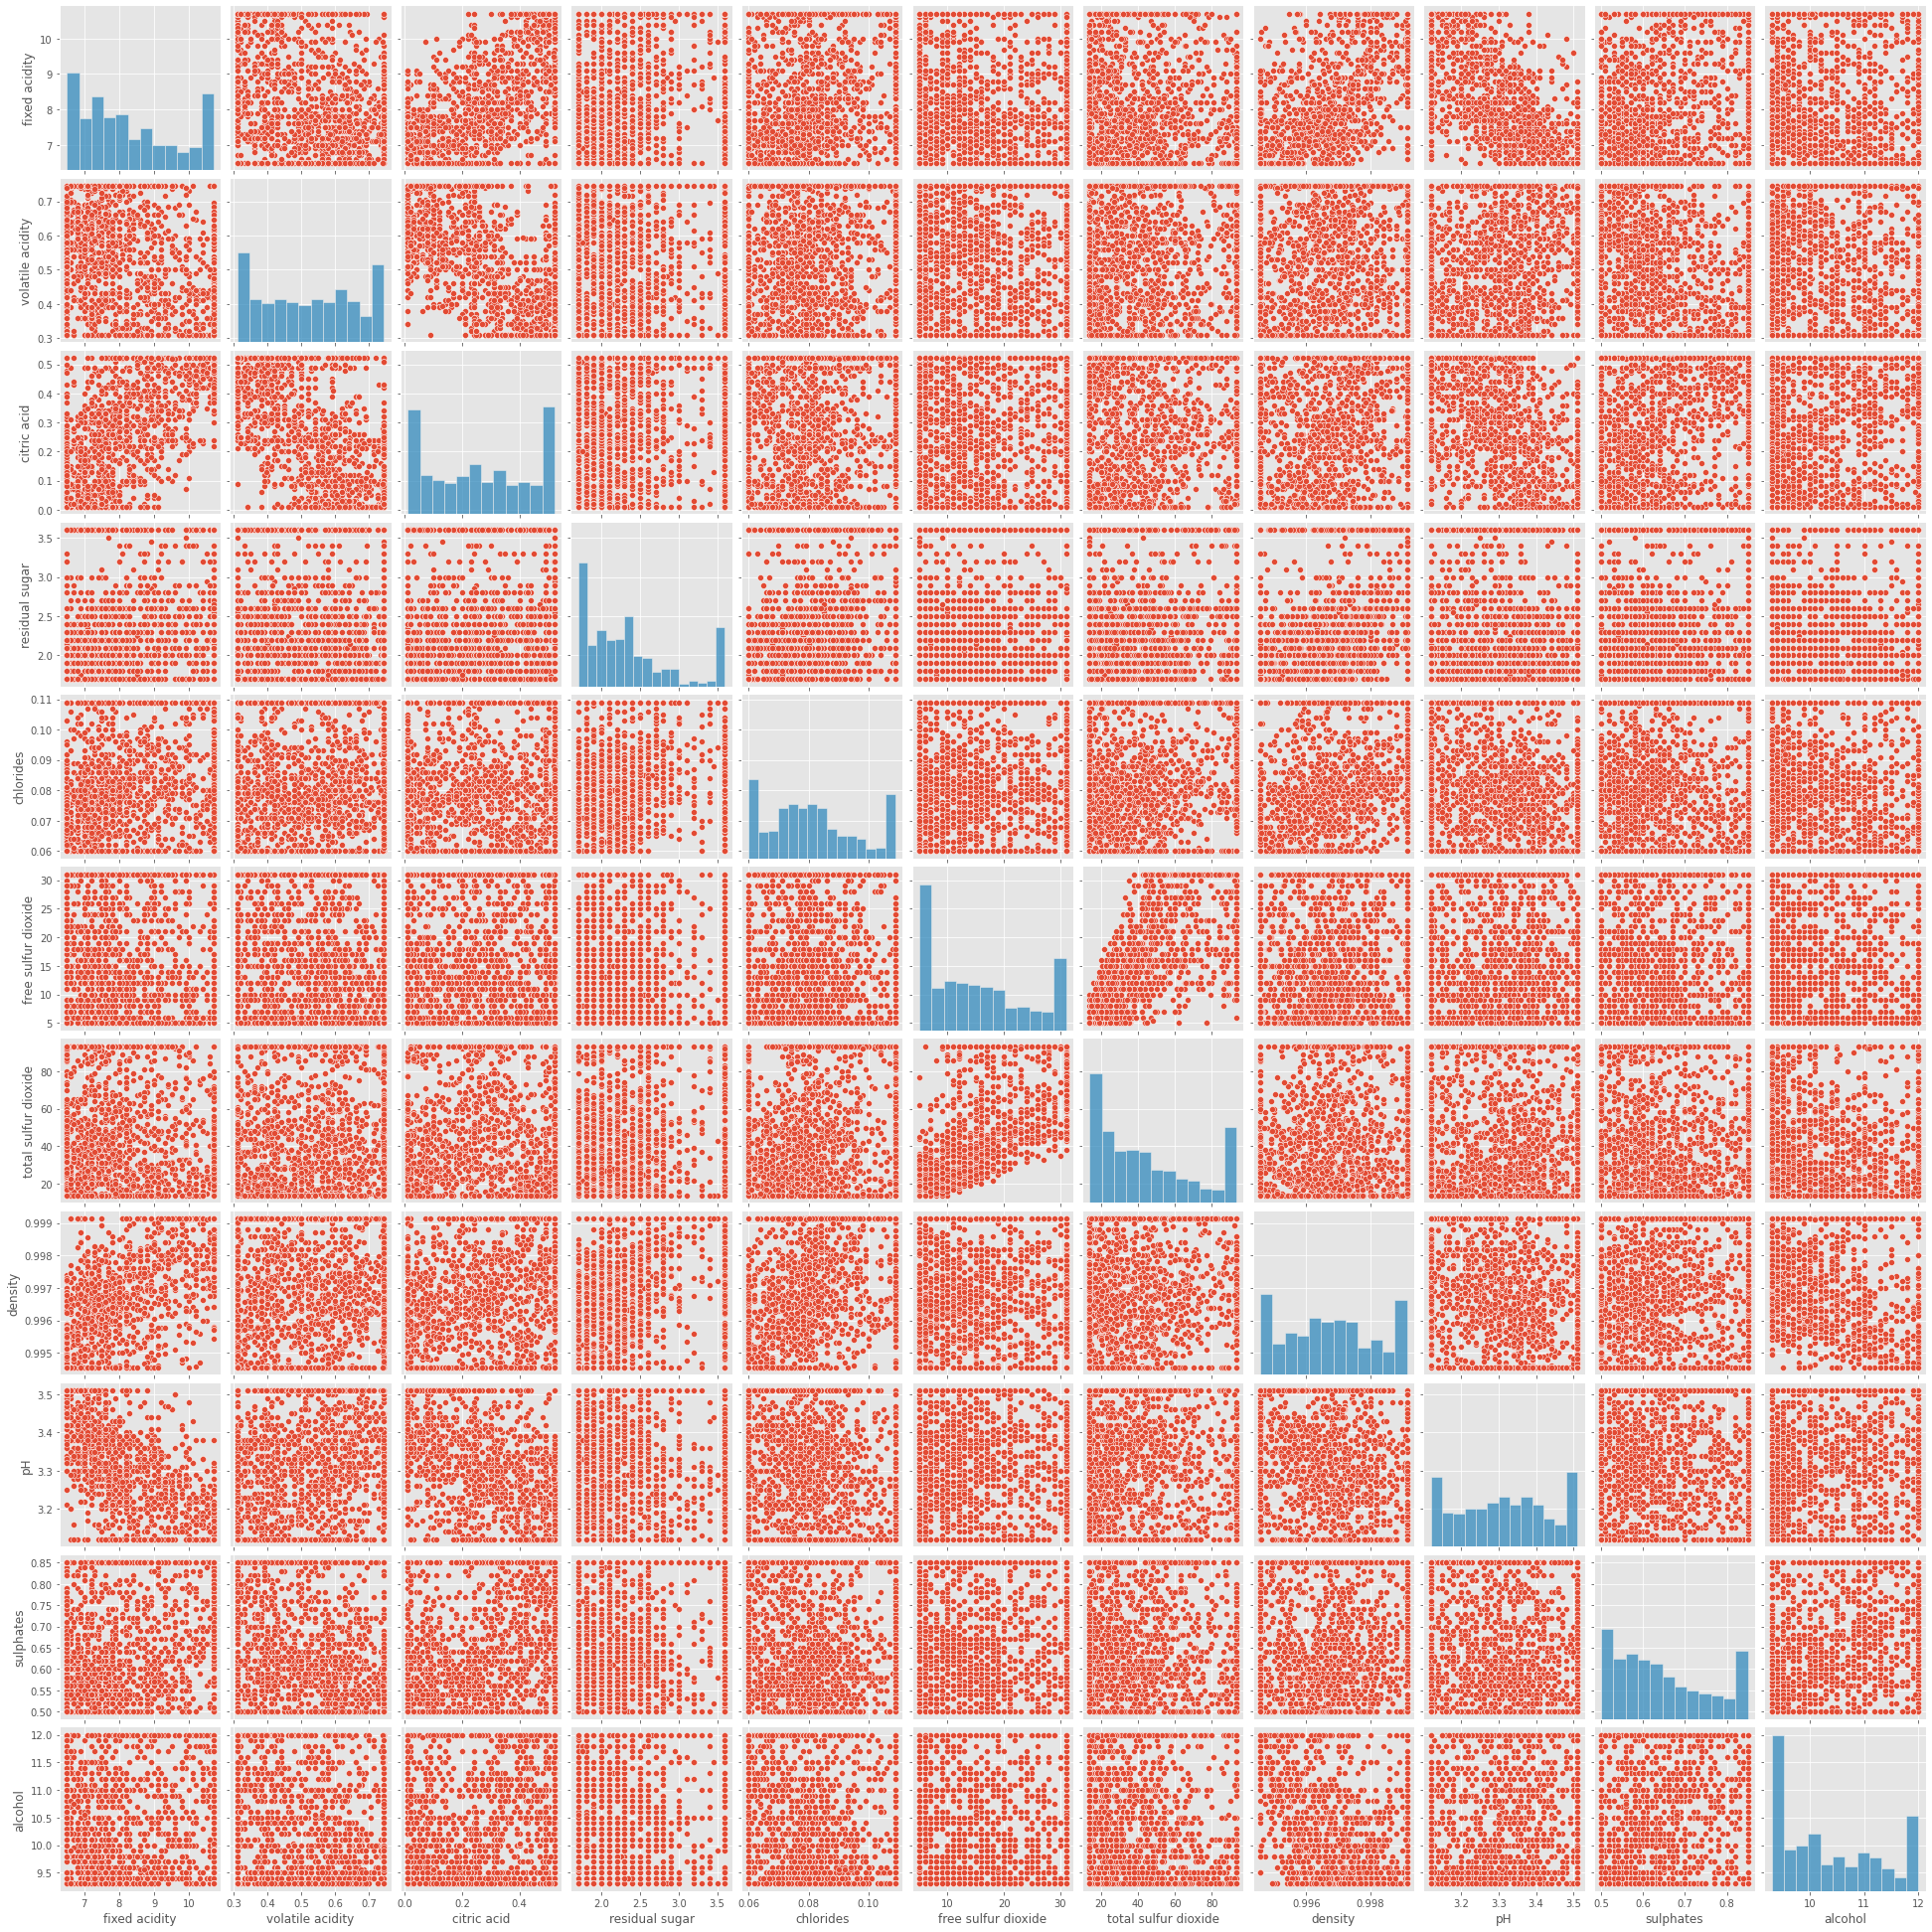

In [13]:
# Verify the effect of Outlier Treatment by plotting Scatter Plots:
sns.pairplot(df3.drop(['quality'], axis=1))

# Bingo! There are no more outliers